In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
titanic_df = pd.read_csv('Titanic.csv')

In [3]:
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


<AxesSubplot:>

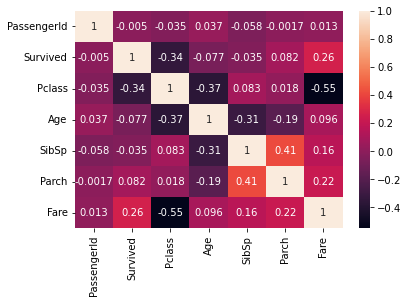

In [4]:
sns.heatmap(titanic_df.corr(), annot=True)

In [5]:
titanic_df=titanic_df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis=1)

In [6]:
target = titanic_df.Survived

In [7]:
inputs = titanic_df.drop('Survived',axis=1)

In [8]:
dummies = pd.get_dummies(inputs.Sex)

In [9]:
dummies.head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [10]:
inputs = pd.concat([inputs,dummies],axis=1)

In [11]:
inputs

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1
...,...,...,...,...,...,...
886,2,male,27.0,13.0000,0,1
887,1,female,19.0,30.0000,1,0
888,3,female,NaN,23.4500,1,0
889,1,male,26.0,30.0000,0,1


In [12]:
inputs = inputs.drop('Sex', axis=1)

In [13]:
inputs.head(3)

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0


In [14]:
inputs.isna().sum()

Pclass      0
Age       177
Fare        0
female      0
male        0
dtype: int64

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
impute = SimpleImputer(missing_values=np.nan, strategy='mean')

In [17]:
imputer = impute.fit(inputs)

In [18]:
imputer

SimpleImputer()

In [19]:
inputs = imputer.transform(inputs)

In [20]:
inputs

array([[ 3.        , 22.        ,  7.25      ,  0.        ,  1.        ],
       [ 1.        , 38.        , 71.2833    ,  1.        ,  0.        ],
       [ 3.        , 26.        ,  7.925     ,  1.        ,  0.        ],
       ...,
       [ 3.        , 29.69911765, 23.45      ,  1.        ,  0.        ],
       [ 1.        , 26.        , 30.        ,  0.        ,  1.        ],
       [ 3.        , 32.        ,  7.75      ,  0.        ,  1.        ]])

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(inputs,target, test_size=0.2)

In [23]:
len(x_train)

712

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
model = GaussianNB()

In [26]:
model.fit(x_train,y_train)

GaussianNB()

In [27]:
model.score(x_test,y_test)

0.7541899441340782

In [28]:
model.predict(x_test)

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0], dtype=int64)

# excersice 2

In [29]:
import pandas as pd

In [30]:
import numpy as np
import seaborn as sns

In [31]:
spam_df = pd.read_csv('spam.csv')

In [32]:
spam_df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [33]:
spam_df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [34]:
spam_df['Category'] = spam_df['Category'].apply(lambda x: 1 if x=='spam' else 0)

In [35]:
spam_df

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test = train_test_split(spam_df.Message,spam_df.Category, test_size=0.3)

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
v = CountVectorizer()

In [40]:
x_train_count = v.fit_transform(x_train.values)

In [41]:
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [42]:
from sklearn.naive_bayes import MultinomialNB

In [43]:
model = MultinomialNB()

In [44]:
model.fit(x_train_count,y_train)

MultinomialNB()

In [45]:
x_test_count = v.transform(x_test)

In [46]:
model.predict(x_test_count)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [47]:
model.score(x_test_count,y_test)

0.9826555023923444

In [48]:
from sklearn.pipeline import Pipeline

In [49]:
clf = Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb', MultinomialNB())
])

In [50]:
clf.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [51]:
clf.score(x_test,y_test)

0.9826555023923444

In [52]:
clf.predict(x_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

# exercise 3

In [53]:
from sklearn import datasets

In [54]:
wine = datasets.load_wine()

In [55]:
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [56]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)

In [57]:
df['target']= wine.target

In [58]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [59]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [60]:
df.drop('target', axis=1)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,Y_train,Y_test = train_test_split(df, wine.target,test_size=0.3)

In [63]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [64]:
model1 = MultinomialNB()

In [65]:
model1.fit(X_train,Y_train)

MultinomialNB()

In [66]:
model1.score(X_test,Y_test)

0.7592592592592593

In [67]:
model2 = GaussianNB()

In [68]:
model2.fit(X_train,Y_train)

GaussianNB()

In [69]:
model2.score(X_test,Y_test)

1.0